In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('breakfast_sale.csv')

In [4]:
data

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,10/1/2023,tarri poha,20,52,5,57,1140
1,10/1/2023,samosa,12,10,12,22,264
2,10/1/2023,samosa,12,23,0,23,276
3,10/1/2023,bread pakoda,20,29,24,53,1060
4,10/1/2023,bread pakoda,20,25,0,25,500
...,...,...,...,...,...,...,...
644,11/28/2023,aloo paratha,30,48,0,48,1440
645,11/28/2023,idli,20,27,10,37,740
646,11/28/2023,idli,20,51,0,51,1020
647,11/28/2023,boiled eggs,20,24,29,53,1060


In [5]:
data.head()

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,10/1/2023,tarri poha,20,52,5,57,1140
1,10/1/2023,samosa,12,10,12,22,264
2,10/1/2023,samosa,12,23,0,23,276
3,10/1/2023,bread pakoda,20,29,24,53,1060
4,10/1/2023,bread pakoda,20,25,0,25,500


In [6]:
data.describe()

,Price,Dine In,Parcel,Total Customers,Total Sales
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,20.363636,27.915254,8.365177,36.280431,757.796610
std,5.452684,15.290517,9.223766,15.075272,417.017092
min,12.000000,7.000000,0.000000,7.000000,84.000000
25%,20.000000,17.000000,0.000000,25.000000,440.000000
50%,20.000000,25.000000,6.000000,34.000000,680.000000
75%,20.000000,33.000000,14.000000,46.000000,980.000000
max,30.000000,75.000000,30.000000,80.000000,2250.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             649 non-null    object
 1   Dish Name        649 non-null    object
 2   Price            649 non-null    int64 
 3   Dine In          649 non-null    int64 
 4   Parcel           649 non-null    int64 
 5   Total Customers  649 non-null    int64 
 6   Total Sales      649 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 35.6+ KB


### EDA

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


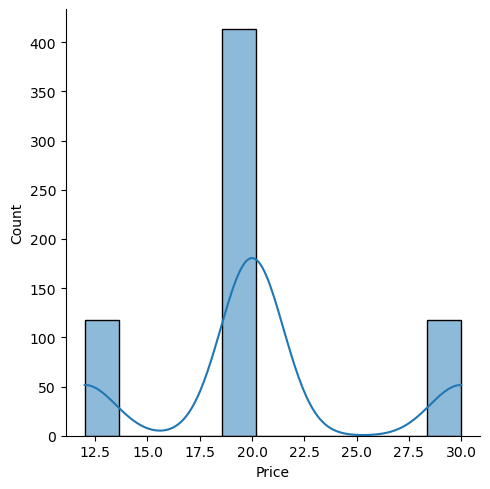

In [8]:
# univarience 

sns.displot(x='Price', data=data, kde=True)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


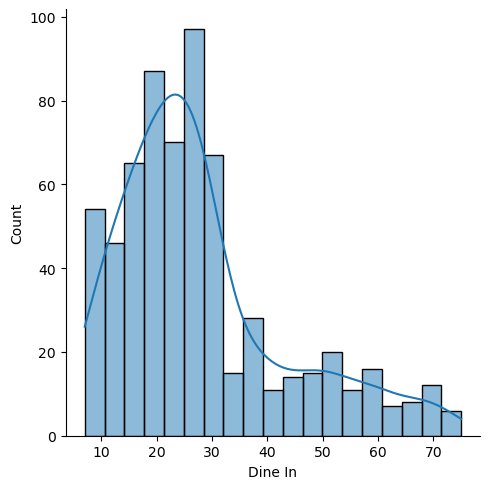

In [9]:
sns.displot(x='Dine In', data=data, kde=True)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


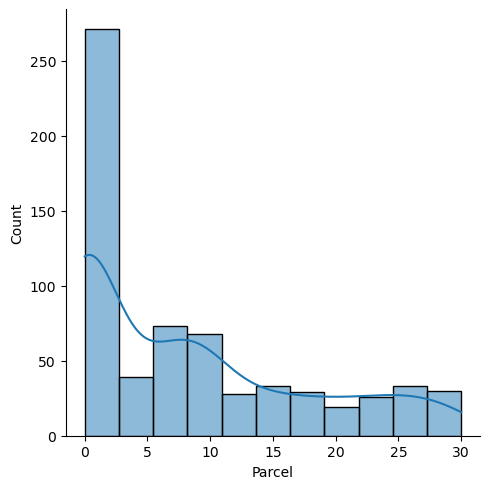

In [10]:
sns.displot(x='Parcel', data=data, kde=True)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


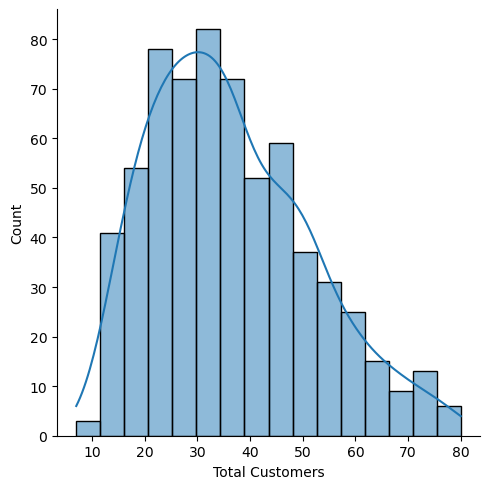

In [11]:
sns.displot(x='Total Customers', data=data, kde=True)

<Axes: xlabel='Dine In', ylabel='Total Sales'>

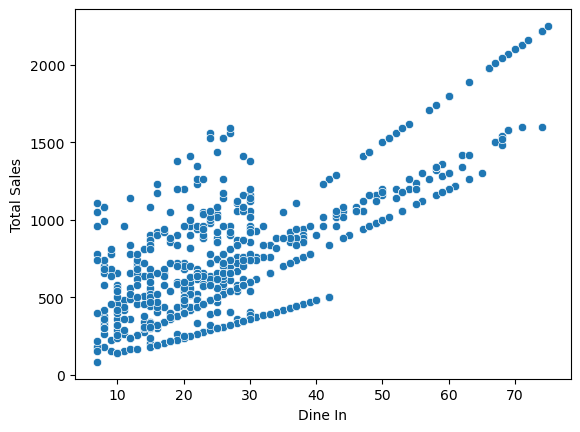

In [12]:
# bivarience 

sns.scatterplot(x='Dine In', y='Total Sales', data=data)

<Axes: xlabel='Parcel', ylabel='Total Sales'>

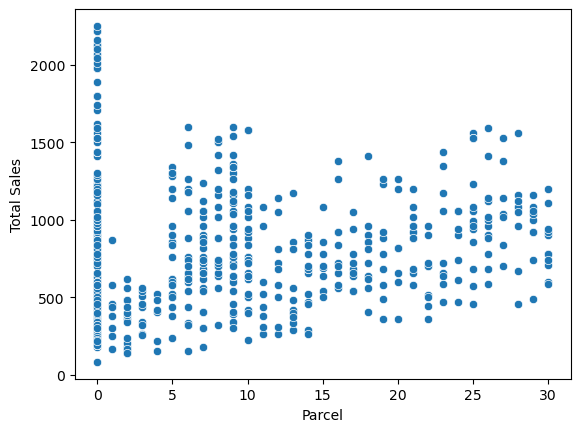

In [13]:
sns.scatterplot(x='Parcel', y='Total Sales', data=data)

C:\Users\sadiamankar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


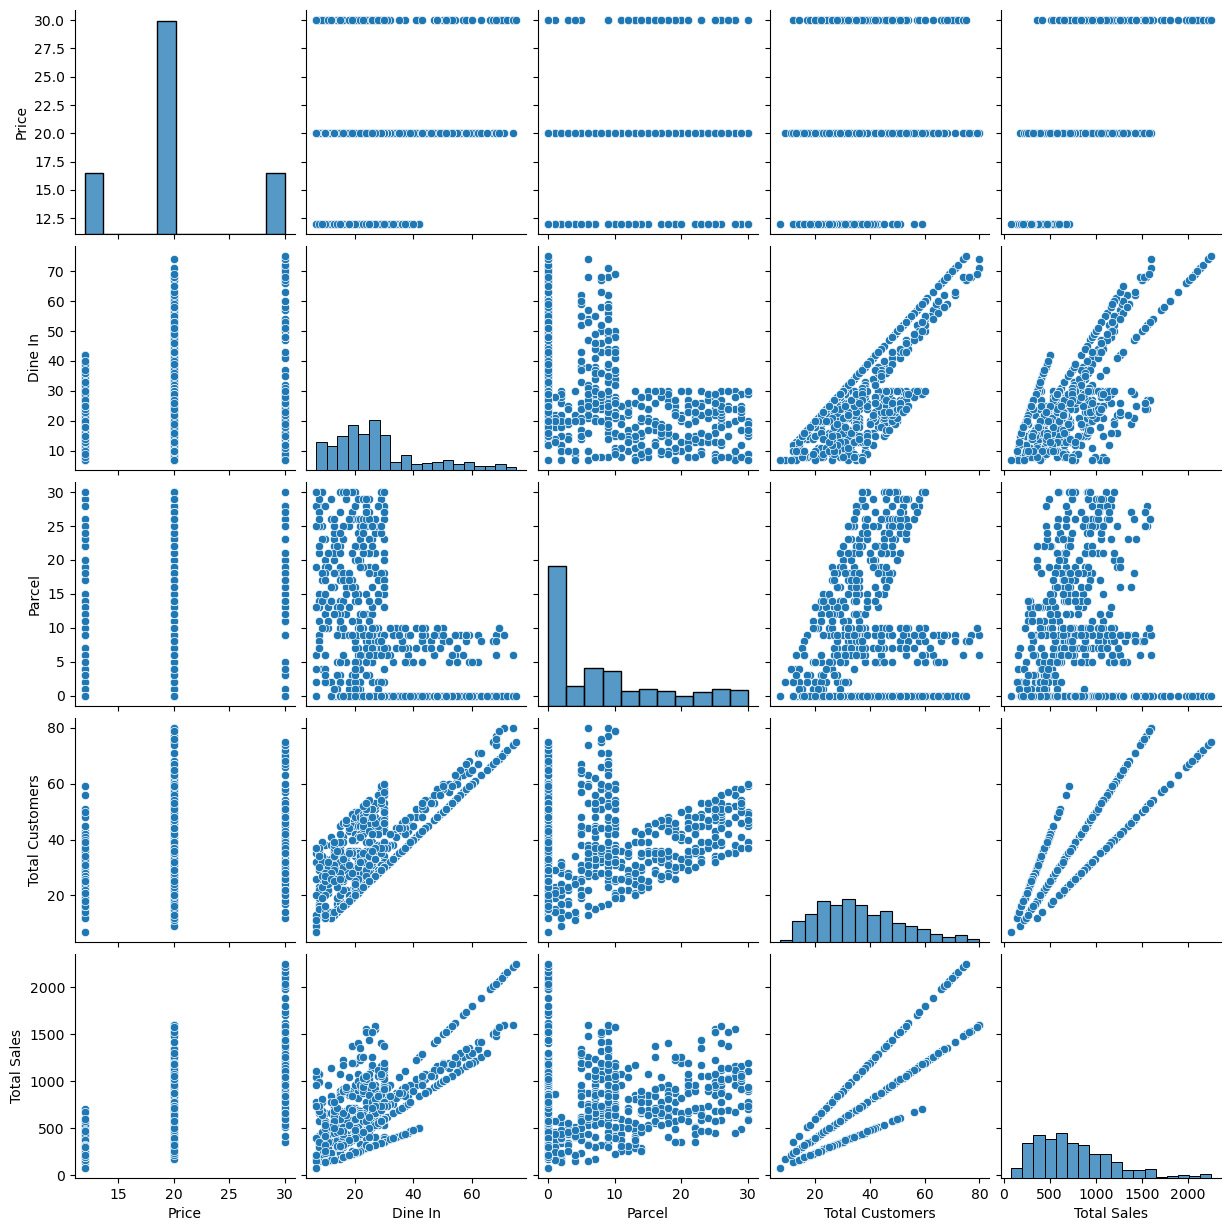

In [14]:
sns.pairplot(data=data)

## Data preprocessing and feature engineering

In [15]:
# missing value

data.isnull().sum()

Date               0
Dish Name          0
Price              0
Dine In            0
Parcel             0
Total Customers    0
Total Sales        0
dtype: int64

In [16]:
# converting  catergorical data to numercial

<Axes: xlabel='Dine In'>

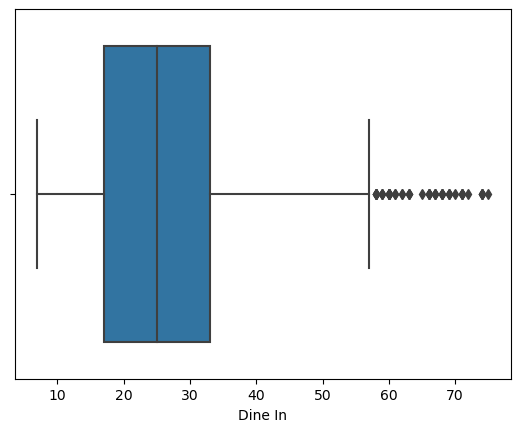

In [17]:
# checking outlier

sns.boxplot(x='Dine In', data=data)

In [229]:
upper_limit=data['Dine In'].mean() + 3*data['Dine In'].std()
lower_limit=data['Dine In'].mean() - 3*data['Dine In'].std()
print('upperlimit:', upper_limit)
print('lowerlimit:', lower_limit)

upperlimit: 73.78680481651287
lowerlimit: -17.956296341936596


In [230]:
data.loc[data['Dine In']> upper_limit]

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
10,10/1/2023,boiled eggs,20,74,6,80,1600
83,10/8/2023,aloo paratha,30,74,0,74,2220
413,11/7/2023,aloo paratha,30,74,0,74,2220
578,11/22/2023,aloo paratha,30,74,0,74,2220
622,11/26/2023,aloo paratha,30,75,0,75,2250


In [231]:
data.loc[data['Dine In'] <lower_limit]

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales


In [232]:
new_data=data.loc[data['Dine In']< upper_limit]
print('olddata:',len(data))
print('newdata:', len(new_data))

olddata: 649
newdata: 644


In [233]:
new_data

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,10/1/2023,tarri poha,20,52,5,57,1140
1,10/1/2023,samosa,12,10,12,22,264
2,10/1/2023,samosa,12,23,0,23,276
3,10/1/2023,bread pakoda,20,29,24,53,1060
4,10/1/2023,bread pakoda,20,25,0,25,500
...,...,...,...,...,...,...,...
644,11/28/2023,aloo paratha,30,48,0,48,1440
645,11/28/2023,idli,20,27,10,37,740
646,11/28/2023,idli,20,51,0,51,1020
647,11/28/2023,boiled eggs,20,24,29,53,1060


<Axes: xlabel='Dine In'>

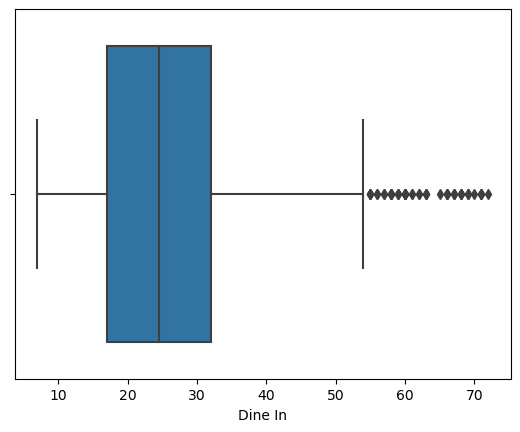

In [234]:
sns.boxplot(x='Dine In', data=new_data)

In [279]:
upper_limit=new_data['Dine In'].mean() + 3*new_data['Dine In'].std()
lower_limit=new_data['Dine In'].mean() - 3*new_data['Dine In'].std()
print('upperlimit:', upper_limit)
print('lowerlimit:', lower_limit)

upperlimit: 71.93450096263156
lowerlimit: -16.822699720395534


In [280]:
n_data=new_data.loc[new_data['Dine In']< upper_limit]
print('olddata:',len(new_data))
print('newdata:', len(n_data))

olddata: 644
newdata: 643


In [281]:
new_data.loc[new_data['Dine In']> upper_limit]

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
259,10/24/2023,aloo paratha,30,72,0,72,2160


<Axes: xlabel='Parcel'>

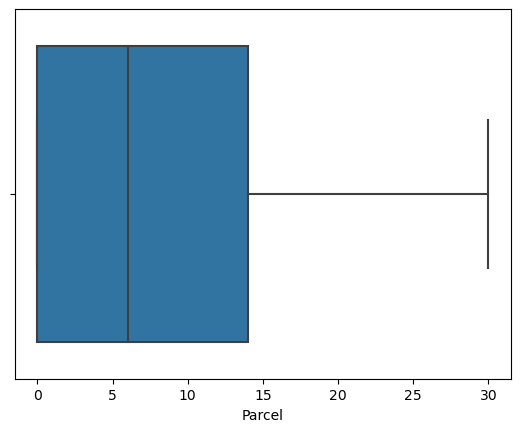

In [282]:

sns.boxplot(x='Parcel', data=data)

<Axes: xlabel='Total Customers'>

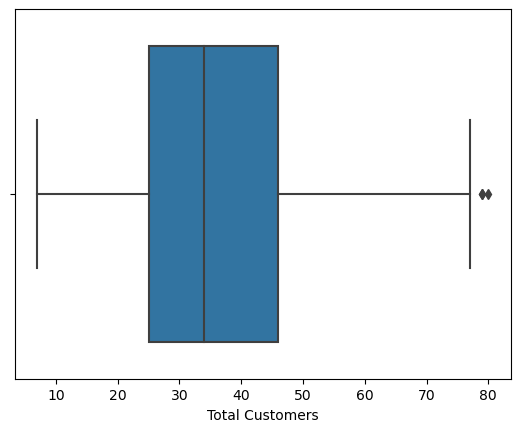

In [283]:
sns.boxplot(x='Total Customers', data=new_data)

In [329]:
upper_limit=new_data['Total Customers'].mean() + 3*new_data['Total Customers'].std()
lower_limit=new_data['Total Customers'].mean() - 3*new_data['Total Customers'].std()
print('upperlimit:', upper_limit)
print('lowerlimit:', lower_limit)

upperlimit: 80.16909560907686
lowerlimit: -8.215679460008552


In [305]:
ndata=n_data.loc[n_data['Total Customers']< upper_limit]
print('olddata:',len(n_data))
print('newdata:', len(ndata))

olddata: 643
newdata: 643


In [306]:
n_data.loc[n_data['Total Customers']> upper_limit]

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales


In [330]:
upper_limit=ndata['Total Customers'].mean() + 3*ndata['Total Customers'].std()
lower_limit=n_data['Total Customers'].mean() - 3*n_data['Total Customers'].std()
print('upperlimit:', upper_limit)
print('lowerlimit:', lower_limit)

upperlimit: 79.94101013587951
lowerlimit: -8.09964155112057


In [332]:
ndata.loc[ndata['Total Customers']> upper_limit]

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
175,10/16/2023,boiled eggs,20,71,9,80,1600


In [333]:
Ndata=ndata.loc[ndata['Total Customers']< upper_limit]
print('olddata:',len(ndata))
print('newdata:', len(Ndata))

olddata: 643
newdata: 642


### Feature Selection

In [335]:
Ndata.head()

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,10/1/2023,tarri poha,20,52,5,57,1140
1,10/1/2023,samosa,12,10,12,22,264
2,10/1/2023,samosa,12,23,0,23,276
3,10/1/2023,bread pakoda,20,29,24,53,1060
4,10/1/2023,bread pakoda,20,25,0,25,500


In [334]:
dat=Ndata.drop(['Date','Dish Name','Price','Dine In'], axis=1)
dat

,Parcel,Total Customers,Total Sales
0,5,57,1140
1,12,22,264
2,0,23,276
3,24,53,1060
4,0,25,500
...,...,...,...
644,0,48,1440
645,10,37,740
646,0,51,1020
647,29,53,1060


In [311]:
dat.corr()

,Parcel,Total Customers,Total Sales
Parcel,1.000000,0.311867,0.229345
Total Customers,0.311867,1.000000,0.867470
Total Sales,0.229345,0.867470,1.000000


<Axes: >

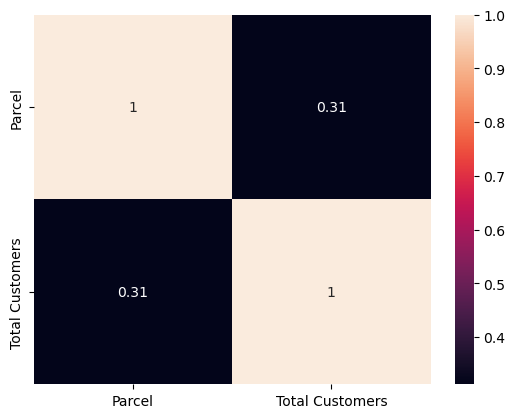

In [312]:
sns.heatmap(dat.drop('Total Sales', axis=1).corr(),annot=True)

## Model creation 

In [336]:
# step 2 independent and dependent variable creation 
x=Ndata[['Parcel','Total Customers']] # x variable contain all input
y=Ndata['Total Sales'] # y cantain output

In [337]:
y

0      1140
1       264
2       276
3      1060
4       500
       ... 
644    1440
645     740
646    1020
647    1060
648     720
Name: Total Sales, Length: 642, dtype: int64

In [338]:
x

,Parcel,Total Customers
0,5,57
1,12,22
2,0,23
3,24,53
4,0,25
...,...,...
644,0,48
645,10,37
646,0,51
647,29,53


In [339]:
# train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [340]:
x_train

,Parcel,Total Customers
278,18,45
329,8,75
572,10,37
206,0,39
384,9,35
...,...,...
605,9,27
364,22,37
444,0,25
177,22,42


In [341]:
x_test

,Parcel,Total Customers
401,5,20
67,4,13
422,0,30
54,8,35
296,9,67
...,...,...
579,17,33
192,25,41
458,14,42
231,5,43


In [342]:
x_test.shape

(129, 2)

In [343]:
y_test

401     600
67      156
422     600
54      700
296    1340
       ... 
579     660
192    1230
458     840
231     860
410     300
Name: Total Sales, Length: 129, dtype: int64

In [344]:
y_train

278     900
329    1500
572     740
206     780
384     700
       ... 
605     540
364     444
444     500
177     504
124     860
Name: Total Sales, Length: 513, dtype: int64

In [345]:
# creating liner
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [346]:
y_test

401     600
67      156
422     600
54      700
296    1340
       ... 
579     660
192    1230
458     840
231     860
410     300
Name: Total Sales, Length: 129, dtype: int64

In [347]:
y_predict

array([ 369.29626499,  203.4231352 ,  619.15466179,  723.01911492,
       1488.46115902,  523.2236355 , 1302.61760509,  307.37882635,
        664.93153268, 1362.62011553,  619.15466179,  523.2236355 ,
        595.17190522,  834.99947094,  405.22478084,  499.24087893,
        379.32709607,  307.37882635,  701.04252457,  978.89601037,
        501.15580712,  489.21004785,  978.71353433,  739.06844465,
        423.18903876,  353.33817328, 1362.62011553,  307.37882635,
       1530.49941153,  800.98588329,  787.0339578 ,  427.29260921,
        930.74802119,  792.96121842,  974.7012019 ,  303.36649392,
        155.45762206,  948.71227911,  379.32709607,  768.97846185,
        619.15466179,  966.67653703,  403.30985264, 1102.73088764,
        403.30985264,  643.13741836, 1338.63735895,  499.24087893,
       1050.84428009,  451.27536579,  555.13981892,  888.89224471,
        647.05851277, 1098.80979323, 1194.74081952,  375.31476364,
        697.03019213,  747.00187149,  774.9969605 ,  571.18914

In [348]:
# evaluation

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [349]:
r2=r2_score(y_test,y_predict)

In [350]:
r2

0.7973322659891046

In [351]:
# adjected
ad=1-(1-0.79)*(129-2)/(129-2-1)
ad

0.7883333333333333

In [352]:
import math
mse=mean_squared_error(y_test,y_predict)
mse

29098.656436611433

In [353]:
rmse=(math.sqrt(mean_squared_error(y_test,y_predict)))
rmse

170.58328299282854

In [43]:
a=data[['Total Customers','Parcel']] # x variable contain all input
b=data['Total Sales'] # y cantain output

In [44]:
a

,Total Customers,Parcel
0,57,5
1,22,12
2,23,0
3,53,24
4,25,0
...,...,...
644,48,0
645,37,10
646,51,0
647,53,29


In [45]:
b

0      1140
1       264
2       276
3      1060
4       500
       ... 
644    1440
645     740
646    1020
647    1060
648     720
Name: Total Sales, Length: 649, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=4)

In [47]:
a_train

,Total Customers,Parcel
408,30,19
228,61,0
618,27,0
280,29,14
520,36,17
...,...,...
599,46,16
360,12,0
439,32,10
174,9,2


In [48]:
a_test

,Total Customers,Parcel
462,44,7
267,21,13
425,22,2
594,56,7
307,59,6
...,...,...
288,23,0
357,33,25
216,22,11
3,53,24


In [49]:
b_train

408     360
228    1220
618     324
280     870
520     720
       ... 
599    1380
360     240
439     640
174     180
122     408
Name: Total Sales, Length: 519, dtype: int64

In [50]:
b_test

462     880
267     420
425     440
594    1120
307    1180
       ... 
288     276
357     990
216     440
3      1060
539     660
Name: Total Sales, Length: 130, dtype: int64

In [51]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(a_train,b_train)
b_predict=LR.predict(a_test)

In [52]:
b_predict

array([ 955.30778675,  359.08473061,  425.49751462, 1254.57792019,
       1333.16578139,  507.85570366,  694.01600195,  547.28716939,
        507.85570366,  755.79436445,  232.07163092,  752.02403661,
        283.40310358,  632.5515926 ,  695.46911903,  782.18665932,
        807.98993078,  414.18653111,  752.02403661, 1655.05788187,
        193.50425886,  947.76713107, 1380.72692621,  748.25370877,
        176.10573675, 1062.60515357, 1221.50906332, 1055.0644979 ,
        571.36225351,  297.03129785,  648.49699762,  644.72666979,
        879.0371363 ,  809.44304786, 1729.87541523,  383.15981473,
        705.91600888,  607.61241481,  461.15865251,  988.65171388,
        260.78113655,  951.53745891,  835.24631932,  608.47650848,
       1361.87528702, 1013.59089167,  283.40310358, 1206.1526817 ,
        647.04388054, 1131.33514834,  676.61747984, 1724.65197031,
       1086.95530795,  408.09899251,  632.5515926 ,   58.95050349,
        922.23892987, 1126.11170342,  632.5515926 ,  648.49699

In [53]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2=r2_score(b_test,b_predict)
r2

0.7514355880478919

In [54]:
ad=1-(1-0.75)*(130-2)/(130-2-1)
ad

0.7480314960629921